#### Step 1: Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn import svm
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


#### Step 2: Load the dataset

In [2]:
df = pd.read_csv("Disease_Symptoms.csv")

#### Step 3: Exploratory Data Analysis and data Preprocessing

In [3]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,headache.1,fever,dizziness.1,breathlessness.1,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
4,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,GERD


In [4]:
df.shape

(3346, 137)

In [5]:
df.size

458402

In [6]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'headache.1', ' fever',
       'dizziness.1', 'breathlessness.1', 'prognosis'],
      dtype='object', length=137)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3346 entries, 0 to 3345
Columns: 137 entries, itching to prognosis
dtypes: int64(136), object(1)
memory usage: 3.5+ MB


In [8]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
headache.1              0
 fever                  0
dizziness.1             0
breathlessness.1        0
prognosis               0
Length: 137, dtype: int64

#### Step 4: Divide the datasets into input and output

In [9]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [10]:
df.shape

(3346, 137)

In [11]:
# Last column are consider as input
X.shape

(3346, 136)

In [12]:
# Only last column is target
y.shape

(3346,)

In [13]:
df.prognosis.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Migraine', 'Cervical spondylosis',
       'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A', 'Hepatitis B',
       'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Alcoholic hepatitis',
       'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo', 'Malaria',
       'Bronchial Asthma', 'Hypertension ',
       'Paralysis (brain hemorrhage)', 'Jaundice', 'COVID-19'],
      dtype=object)

In [14]:
df['prognosis'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Fungal infection
1       Fungal infection
2                Allergy
3                Allergy
4                   GERD
              ...       
3341            COVID-19
3342            COVID-19
3343            COVID-19
3344            COVID-19
3345            COVID-19
Name: prognosis, Length: 3346, dtype: object>

In [15]:
# Checking whether the dataset is balanced or not
disease_counts = df["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
 
print(temp_df['Disease'], " and ",temp_df['Counts'])

0                         Alcoholic hepatitis
1                                 Hepatitis E
2                                Tuberculosis
3                                 Hepatitis B
4                                 Hepatitis D
5                Dimorphic hemmorhoids(piles)
6                                Heart attack
7                                   Pneumonia
8                                 Common Cold
9                                 Hepatitis C
10                             Varicose veins
11                               Hypoglycemia
12                             Hypothyroidism
13                            Hyperthyroidism
14                                hepatitis A
15                                  Arthritis
16                            Osteoarthristis
17    (vertigo) Paroymsal  Positional Vertigo
18                                       Acne
19                                     Dengue
20                                    Typhoid
21                                

#### Step 5: Divide the datasets into training and testing

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
print(df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3346, 137)
(2676, 136)
(670, 136)
(2676,)
(670,)


#### Step 6:  Suppose vector machine

###### Build and train the models using SVM

In [18]:
svmodel1 = svm.SVC(kernel='linear')
svmodel2 = svm.SVC(kernel='poly')
svmodel3 = svm.SVC(kernel='rbf')

In [19]:
svmodel1.fit(X_train,y_train)
svmodel2.fit(X_train,y_train)
svmodel3.fit(X_train,y_train)

SVC()

##### Do the prediction of SVM models

In [20]:
y_pred1 = svmodel1.predict(X_test)
y_pred2 = svmodel2.predict(X_test)
y_pred3 = svmodel3.predict(X_test)

##### Evalute the SVM models

In [21]:
print("Model 1 accuracy: ",metrics.accuracy_score(y_pred1, y_test))
print("Model 2 accuracy: ",metrics.accuracy_score(y_pred2, y_test))
print("Model 3 accuracy: ",metrics.accuracy_score(y_pred3, y_test))

Model 1 accuracy:  1.0
Model 2 accuracy:  0.9955223880597015
Model 3 accuracy:  1.0


#### Step 7: Naive Bayes

##### Build and train the model using Naive Bayes

In [22]:
nbmodel = GaussianNB()

In [23]:
nbmodel.fit(X_train, y_train)

GaussianNB()

In [24]:
nbmodel.score(X_test, y_test)

1.0

##### Do the prediction of Naive Bayes model

In [25]:
y_pred4 = nbmodel.predict(X_test)

##### Evalute the Naive bayes model

In [26]:
print('Accuracy Score on test data: ',accuracy_score(y_true=y_test, y_pred=y_pred4))

Accuracy Score on test data:  1.0


#### Step 8: Logistic Regression

#####  Build and train the model using Logistic Regression

In [27]:
lrmodel = LogisticRegression()

In [28]:
lrmodel.fit(X_train, y_train)

LogisticRegression()

#####  Do the prediction of Logistic Regression model

In [29]:
y_pred5 = lrmodel.predict(X_test)

In [30]:
y_pred5

array(['Dengue', 'Heart attack', 'Hypoglycemia',
       'Dimorphic hemmorhoids(piles)', 'Hypertension ',
       'Cervical spondylosis', 'Psoriasis', 'Hepatitis D', 'Chicken pox',
       'Psoriasis', 'Alcoholic hepatitis', 'Acne', 'Chicken pox',
       'Typhoid', 'Osteoarthristis', 'Migraine', 'Hepatitis D',
       'Arthritis', 'Hypothyroidism', 'GERD', 'Typhoid', 'Arthritis',
       'Hyperthyroidism', 'Osteoarthristis', 'Hepatitis D',
       '(vertigo) Paroymsal  Positional Vertigo', 'Hepatitis C',
       'Common Cold', 'Paralysis (brain hemorrhage)', 'Arthritis',
       'Hypoglycemia', 'Pneumonia', 'Varicose veins', 'Typhoid',
       'Dimorphic hemmorhoids(piles)', 'Cervical spondylosis', 'Migraine',
       'Common Cold', 'Bronchial Asthma', 'Typhoid', 'Hypoglycemia',
       'Hypoglycemia', 'Urinary tract infection', 'Osteoarthristis',
       'Dimorphic hemmorhoids(piles)',
       '(vertigo) Paroymsal  Positional Vertigo', 'Varicose veins',
       'Urinary tract infection', 'Chicken p

In [31]:
y_test

array(['Dengue', 'Heart attack', 'Hypoglycemia',
       'Dimorphic hemmorhoids(piles)', 'Hypertension ',
       'Cervical spondylosis', 'Psoriasis', 'Hepatitis D', 'Chicken pox',
       'Psoriasis', 'Alcoholic hepatitis', 'Acne', 'Chicken pox',
       'Typhoid', 'Osteoarthristis', 'Migraine', 'Hepatitis D',
       'Arthritis', 'Hypothyroidism', 'GERD', 'Typhoid', 'Arthritis',
       'Hyperthyroidism', 'Osteoarthristis', 'Hepatitis D',
       '(vertigo) Paroymsal  Positional Vertigo', 'Hepatitis C',
       'Common Cold', 'Paralysis (brain hemorrhage)', 'Arthritis',
       'Hypoglycemia', 'Pneumonia', 'Varicose veins', 'Typhoid',
       'Dimorphic hemmorhoids(piles)', 'Cervical spondylosis', 'Migraine',
       'Common Cold', 'Bronchial Asthma', 'Typhoid', 'Hypoglycemia',
       'Hypoglycemia', 'Urinary tract infection', 'Osteoarthristis',
       'Dimorphic hemmorhoids(piles)',
       '(vertigo) Paroymsal  Positional Vertigo', 'Varicose veins',
       'Urinary tract infection', 'Chicken p

In [32]:
lrmodel.score(X_test,y_test)

1.0

In [33]:
print('Accuracy Score on test data: ',accuracy_score(y_true=y_test, y_pred=y_pred5))

Accuracy Score on test data:  1.0


#### Step 9: K-Nearest Neighbor

##### Choosing best value for K

In [34]:
error_rate = []

for i in range(1,10):
    knnmodel = KNeighborsClassifier(n_neighbors=i)
    knnmodel.fit(X_train,y_train)
    pred_i = knnmodel.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [35]:
error_rate
# here error rate is zero for all the k values, we can take any value for k

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

##### Build and train the model using K-nearest neighbor

In [36]:
knnmodel = KNeighborsClassifier(n_neighbors=3)

In [37]:
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

##### Do the prediction of KNN model

In [38]:
y_pred = knnmodel.predict(X_test)

In [39]:
y_test

array(['Dengue', 'Heart attack', 'Hypoglycemia',
       'Dimorphic hemmorhoids(piles)', 'Hypertension ',
       'Cervical spondylosis', 'Psoriasis', 'Hepatitis D', 'Chicken pox',
       'Psoriasis', 'Alcoholic hepatitis', 'Acne', 'Chicken pox',
       'Typhoid', 'Osteoarthristis', 'Migraine', 'Hepatitis D',
       'Arthritis', 'Hypothyroidism', 'GERD', 'Typhoid', 'Arthritis',
       'Hyperthyroidism', 'Osteoarthristis', 'Hepatitis D',
       '(vertigo) Paroymsal  Positional Vertigo', 'Hepatitis C',
       'Common Cold', 'Paralysis (brain hemorrhage)', 'Arthritis',
       'Hypoglycemia', 'Pneumonia', 'Varicose veins', 'Typhoid',
       'Dimorphic hemmorhoids(piles)', 'Cervical spondylosis', 'Migraine',
       'Common Cold', 'Bronchial Asthma', 'Typhoid', 'Hypoglycemia',
       'Hypoglycemia', 'Urinary tract infection', 'Osteoarthristis',
       'Dimorphic hemmorhoids(piles)',
       '(vertigo) Paroymsal  Positional Vertigo', 'Varicose veins',
       'Urinary tract infection', 'Chicken p

In [40]:
y_pred

array(['Dengue', 'Heart attack', 'Hypoglycemia',
       'Dimorphic hemmorhoids(piles)', 'Hypertension ',
       'Cervical spondylosis', 'Psoriasis', 'Hepatitis D', 'Chicken pox',
       'Psoriasis', 'Alcoholic hepatitis', 'Acne', 'Chicken pox',
       'Typhoid', 'Osteoarthristis', 'Migraine', 'Hepatitis D',
       'Arthritis', 'Hypothyroidism', 'GERD', 'Typhoid', 'Arthritis',
       'Hyperthyroidism', 'Osteoarthristis', 'Hepatitis D',
       '(vertigo) Paroymsal  Positional Vertigo', 'Hepatitis C',
       'Common Cold', 'Paralysis (brain hemorrhage)', 'Arthritis',
       'Hypoglycemia', 'Pneumonia', 'Varicose veins', 'Typhoid',
       'Dimorphic hemmorhoids(piles)', 'Cervical spondylosis', 'Migraine',
       'Common Cold', 'Bronchial Asthma', 'Typhoid', 'Hypoglycemia',
       'Hypoglycemia', 'Urinary tract infection', 'Osteoarthristis',
       'Dimorphic hemmorhoids(piles)',
       '(vertigo) Paroymsal  Positional Vertigo', 'Varicose veins',
       'Urinary tract infection', 'Chicken p

##### Evalute the KNN model

In [41]:
print(confusion_matrix(y_test,y_pred))

[[14  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 30  0  0]
 [ 0  0  0 ...  0 26  0]
 [ 0  0  0 ...  0  0 26]]


In [42]:
print(classification_report(y_pred,y_test))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        14
                                   AIDS       1.00      1.00      1.00         2
                                   Acne       1.00      1.00      1.00        23
                    Alcoholic hepatitis       1.00      1.00      1.00        20
                                Allergy       1.00      1.00      1.00         2
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00         1
                               COVID-19       1.00      1.00      1.00         2
                   Cervical spondylosis       1.00      1.00      1.00        15
                            Chicken pox       1.00      1.00      1.00        20
                    Chronic cholestasis       1.00      1.00      1.00         3
                           

#### Step 10: Decision tree

##### Build and train the model using Decision Tree

In [43]:
dtmodel = DecisionTreeClassifier()

In [44]:
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier()

##### Do the prediction of Decision tree model

In [45]:
y_pred6 = dtmodel.predict(X_test)

In [46]:
y_pred6

array(['Dengue', 'Heart attack', 'Hypoglycemia',
       'Dimorphic hemmorhoids(piles)', 'Hypertension ',
       'Cervical spondylosis', 'Psoriasis', 'Hepatitis D', 'Chicken pox',
       'Psoriasis', 'Alcoholic hepatitis', 'Acne', 'Chicken pox',
       'Typhoid', 'Osteoarthristis', 'Migraine', 'Hepatitis D',
       'Arthritis', 'Hypothyroidism', 'GERD', 'Typhoid', 'Arthritis',
       'Hyperthyroidism', 'Osteoarthristis', 'Hepatitis D',
       '(vertigo) Paroymsal  Positional Vertigo', 'Hepatitis C',
       'Common Cold', 'Paralysis (brain hemorrhage)', 'Arthritis',
       'Hypoglycemia', 'Pneumonia', 'Varicose veins', 'Typhoid',
       'Dimorphic hemmorhoids(piles)', 'Cervical spondylosis', 'Migraine',
       'Common Cold', 'Bronchial Asthma', 'Typhoid', 'Hypoglycemia',
       'Hypoglycemia', 'Urinary tract infection', 'Osteoarthristis',
       'Dimorphic hemmorhoids(piles)',
       '(vertigo) Paroymsal  Positional Vertigo', 'Varicose veins',
       'Urinary tract infection', 'Chicken p

In [47]:
y_test

array(['Dengue', 'Heart attack', 'Hypoglycemia',
       'Dimorphic hemmorhoids(piles)', 'Hypertension ',
       'Cervical spondylosis', 'Psoriasis', 'Hepatitis D', 'Chicken pox',
       'Psoriasis', 'Alcoholic hepatitis', 'Acne', 'Chicken pox',
       'Typhoid', 'Osteoarthristis', 'Migraine', 'Hepatitis D',
       'Arthritis', 'Hypothyroidism', 'GERD', 'Typhoid', 'Arthritis',
       'Hyperthyroidism', 'Osteoarthristis', 'Hepatitis D',
       '(vertigo) Paroymsal  Positional Vertigo', 'Hepatitis C',
       'Common Cold', 'Paralysis (brain hemorrhage)', 'Arthritis',
       'Hypoglycemia', 'Pneumonia', 'Varicose veins', 'Typhoid',
       'Dimorphic hemmorhoids(piles)', 'Cervical spondylosis', 'Migraine',
       'Common Cold', 'Bronchial Asthma', 'Typhoid', 'Hypoglycemia',
       'Hypoglycemia', 'Urinary tract infection', 'Osteoarthristis',
       'Dimorphic hemmorhoids(piles)',
       '(vertigo) Paroymsal  Positional Vertigo', 'Varicose veins',
       'Urinary tract infection', 'Chicken p

##### Evalute the decision tree model

In [48]:
print('Accuracy Score on test data: ',accuracy_score(y_true=y_test, y_pred=y_pred6))

Accuracy Score on test data:  0.9985074626865672


In [49]:
print(confusion_matrix(y_test,y_pred))

[[14  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 30  0  0]
 [ 0  0  0 ...  0 26  0]
 [ 0  0  0 ...  0  0 26]]


##### Plot the decision tree

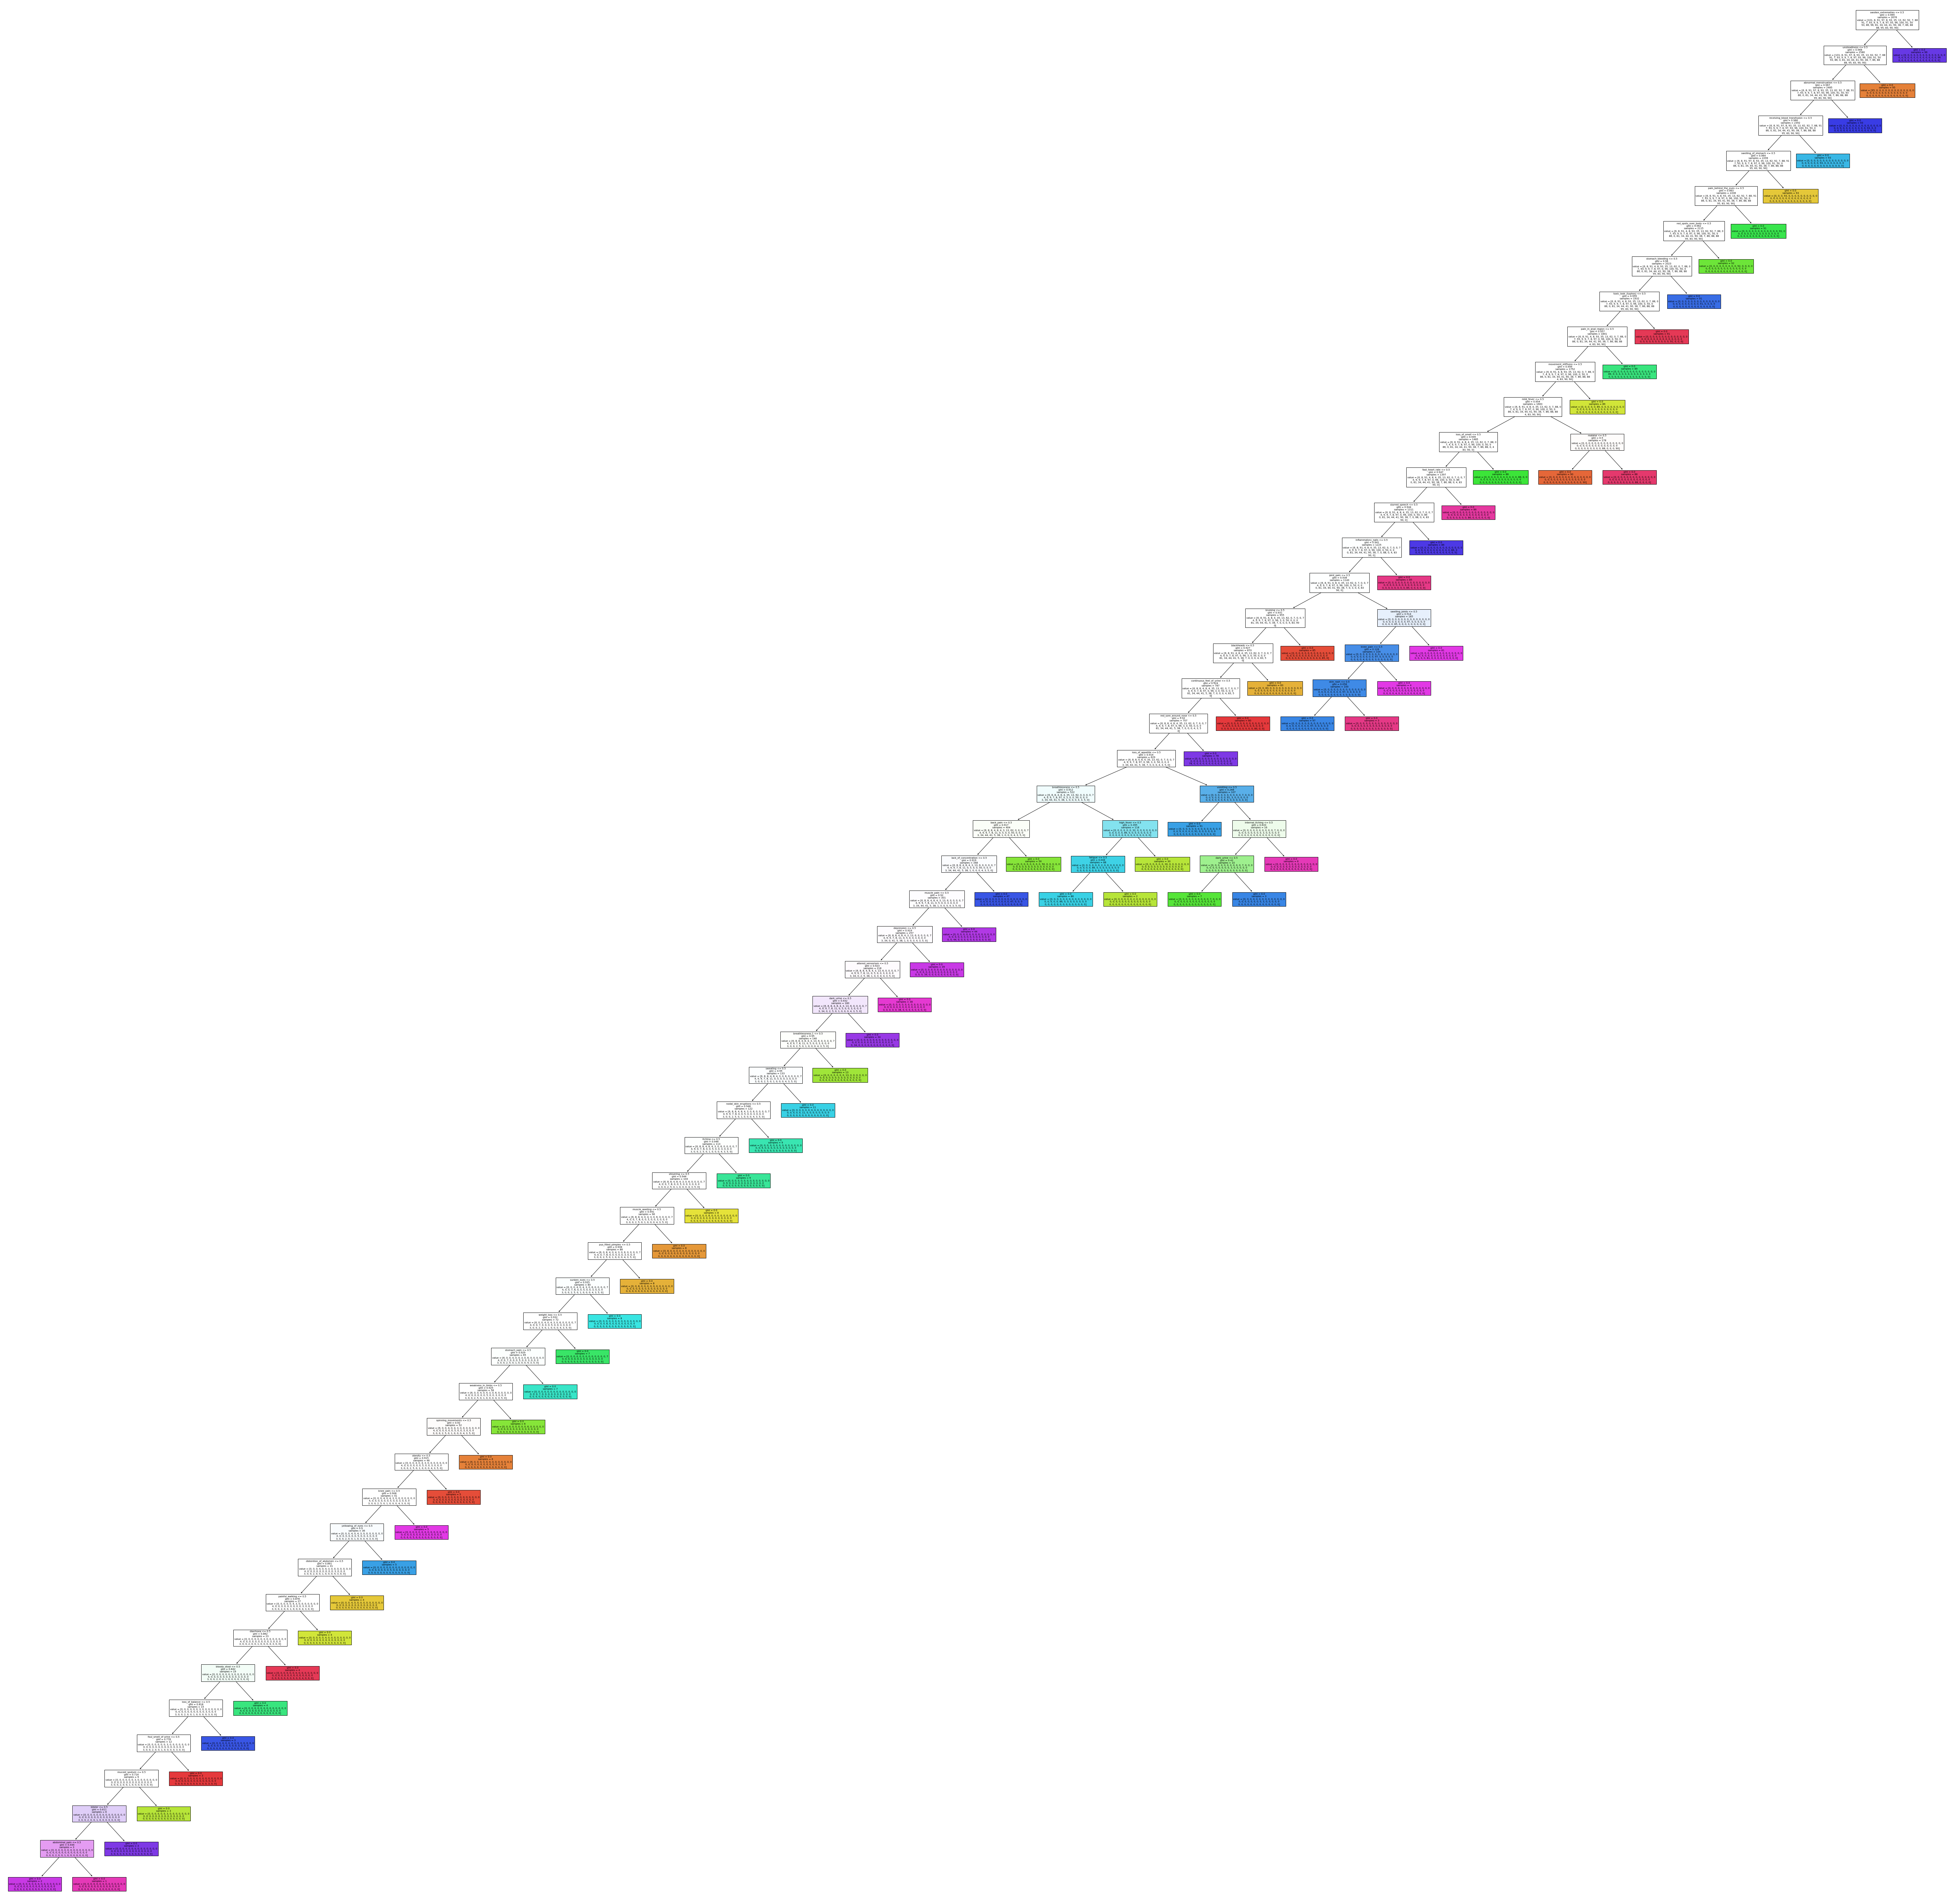

In [50]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(100,100))
# _ underscore it is a variable

_ = tree.plot_tree(
     dtmodel,
    feature_names=df.columns,
    filled =True
)

##### Manually prediction of decision tree model

In [52]:
# prediction for first row in dataset
dtmodel.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
]])

array(['COVID-19'], dtype=object)

In [ ]:
df.head()